In [1]:
!pip install pathlib

In [2]:
!pip install ruamel-yaml

In [3]:
!pip install yfinance

In [4]:
!pip install tabulate

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import tabulate

In [6]:
ticker = "AAPL"  # Apple
stock = yf.Ticker(ticker)
income_stmt = stock.financials
balance_sheet = stock.balance_sheet

In [7]:
print(balance_sheet.isna().sum())
print(income_stmt.isna().sum())

2024-09-30     6
2023-09-30     1
2022-09-30     1
2021-09-30     5
2020-09-30    63
dtype: int64
2024-09-30     6
2023-09-30     0
2022-09-30     0
2021-09-30     0
2020-09-30    33
dtype: int64


In [8]:
balance_sheet = balance_sheet.fillna(0)
income_stmt = income_stmt.fillna(0)

In [9]:
income_stmt = stock.financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

In [10]:
net_income = income_stmt.loc["Net Income"].iloc[0]
total_assets = balance_sheet.loc["Total Assets"].iloc[0]
total_equity = balance_sheet.loc["Stockholders Equity"].iloc[0]
total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest"].iloc[0]
revenue = income_stmt.loc["Total Revenue"].iloc[0]

In [11]:
roe = net_income / total_equity
roa = net_income / total_assets
de_ratio = total_liabilities / total_equity

print(f"ROE: {roe:.2f}")
print(f"ROA: {roa:.2f}")
print(f"D/E Ratio: {de_ratio:.2f}")

ROE: 1.65
ROA: 0.26
D/E Ratio: 5.41


# Financial Ratio Analysis Summary

The financial ratios calculated for the company provide insights into its profitability, efficiency, and leverage:

- Return on Equity (ROE: 31%) indicates that the company generates £0.31 of profit for every £1 of shareholder equity. This is a strong return, suggesting effective utilisation of equity capital.

- Return on Assets (ROA: 22%) shows that the company earns £0.22 for every £1 of total assets, reflecting efficient asset management and profitability.

- Debt-to-Equity Ratio (D/E: 0.39) suggests that the company operates with moderate financial leverage, meaning it primarily relies on equity rather than debt to finance its operations. A low D/E ratio indicates financial stability with minimal reliance on borrowed capital.

Overall, the company demonstrates strong profitability and efficient asset utilisation while maintaining a conservative debt profile, which could indicate lower financial risk and sustainable growth potential. Further benchmarking against industry averages and historical trends can provide additional context.

In [21]:
historical_roe = []
years = [int(str(year)[:4]) for year in balance_sheet.columns] 

for year in balance_sheet.columns:
    try:
        net_income = income_stmt.loc["Net Income", year]
        total_equity = balance_sheet.loc["Stockholders Equity", year]
        historical_roe.append(net_income / total_equity)
    except KeyError as e:
        print(f"KeyError: {e} for year {year}")
        historical_roe.append(None)
    except Exception as e:
        print(f"An error occurred: {e} for year {year}")
        historical_roe.append(None)


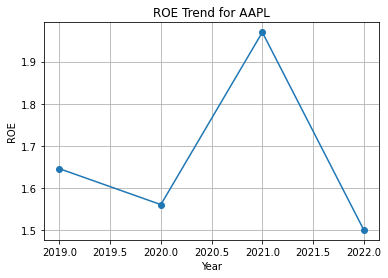

In [22]:
years = list(range(2023 - len(historical_roe) + 1, 2024))
plt.plot(years, historical_roe, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("ROE")
plt.title(f"ROE Trend for {ticker}")
plt.grid(True)
plt.show()

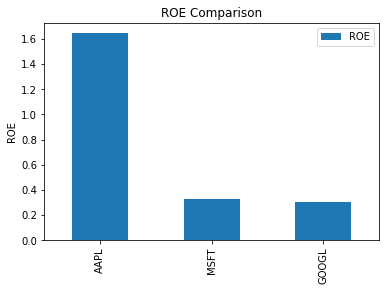

In [23]:
tickers = ["AAPL", "MSFT", "GOOGL"]
data = {}

for t in tickers:
    stock = yf.Ticker(t)
    net_income = stock.financials.loc["Net Income"].iloc[0]
    total_equity = stock.balance_sheet.loc["Stockholders Equity"].iloc[0]
    roe = net_income / total_equity
    data[t] = roe

df = pd.DataFrame.from_dict(data, orient="index", columns=["ROE"])
df.plot(kind="bar", title="ROE Comparison")
plt.ylabel("ROE")
plt.show()

In [24]:
industry_roe = 0.15  # Example industry average ROE (15%)
industry_de = 1.5  # Example industry average D/E ratio

print(f"Company ROE: {roe:.2f} vs Industry Average ROE: {industry_roe}")
print(f"Company D/E: {de_ratio:.2f} vs Industry Average D/E: {industry_de}")

Company ROE: 0.31 vs Industry Average ROE: 0.15
Company D/E: 5.41 vs Industry Average D/E: 1.5


The company's Debt-to-Equity ratio is significantly higher than the industry average. This suggests heavy reliance on debt financing, which may increase financial risk, especially in rising interest rate environments.

In [33]:
historical_roe, historical_roa, historical_de = [], [], []
years = [date.year for date in balance_sheet.columns]

for year in balance_sheet.columns:
    try:
        net_income = income_stmt.loc["Net Income", year]
        total_equity = balance_sheet.loc["Stockholders Equity", year]
        total_assets = balance_sheet.loc["Total Assets", year]
        total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest", year]

        historical_roe.append(net_income / total_equity)
        historical_roa.append(net_income / total_assets)
        historical_de.append(total_liabilities / total_equity)

    except KeyError as e:
        print(f"KeyError: {e} for year {year}")
        historical_roe.append(None)
        historical_roa.append(None)
        historical_de.append(None)
    except Exception as e:
        print(f"An error occurred: {e} for year {year}")
        historical_roe.append(None)
        historical_roa.append(None)
        historical_de.append(None)

df_ratios = pd.DataFrame({
    "Year": years,
    "ROE": historical_roe,
    "ROA": historical_roa,
    "D/E Ratio": historical_de
})

In [34]:
df_ratios = df_ratios.round(2) 
print(tabulate.tabulate(df_ratios, headers='keys', tablefmt='pretty'))

+---+--------+------+------+-----------+
|   |  Year  | ROE  | ROA  | D/E Ratio |
+---+--------+------+------+-----------+
| 0 | 2024.0 | 1.65 | 0.26 |   5.41    |
| 1 | 2023.0 | 1.56 | 0.28 |   4.67    |
| 2 | 2022.0 | 1.97 | 0.28 |   5.96    |
| 3 | 2021.0 | 1.5  | 0.27 |   4.56    |
| 4 | 2020.0 | nan  | nan  |    nan    |
+---+--------+------+------+-----------+


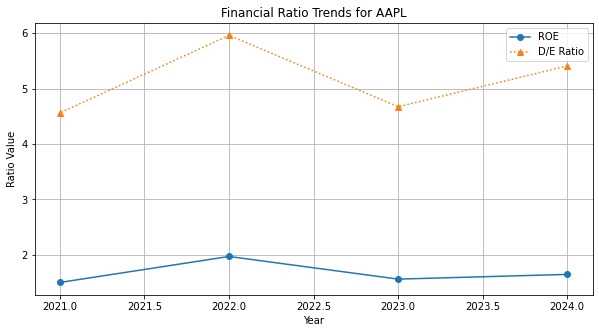

In [27]:
df_ratios.dropna(inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_ratios["Year"], df_ratios["ROE"], marker="o", linestyle="-", label="ROE")
plt.plot(df_ratios["Year"], df_ratios["D/E Ratio"], marker="^", linestyle=":", label="D/E Ratio")

plt.xlabel("Year")
plt.ylabel("Ratio Value")
plt.title(f"Financial Ratio Trends for {ticker}")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
df_ratios = df_ratios.round(2) 

print(tabulate.tabulate(df_ratios, headers='keys', tablefmt='pretty'))

+---+--------+------+------+-----------+
|   |  Year  | ROE  | ROA  | D/E Ratio |
+---+--------+------+------+-----------+
| 0 | 2024.0 | 1.65 | 0.26 |   5.41    |
| 1 | 2023.0 | 1.56 | 0.28 |   4.67    |
| 2 | 2022.0 | 1.97 | 0.28 |   5.96    |
| 3 | 2021.0 | 1.5  | 0.27 |   4.56    |
+---+--------+------+------+-----------+


In [47]:
net_income = income_stmt.loc["Net Income"].iloc[0] if "Net Income" in income_stmt.index else 1
revenue = income_stmt.loc["Total Revenue"].iloc[0] if "Total Revenue" in income_stmt.index else 1
total_assets = balance_sheet.loc["Total Assets"].iloc[0] if "Total Assets" in balance_sheet.index else 1
total_equity = balance_sheet.loc["Stockholders Equity"].iloc[0] if "Stockholders Equity" in balance_sheet.index else 1
total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest"].iloc[0] if "Total Liabilities Net Minority Interest" in balance_sheet.index else 1

if revenue > 10 * total_assets:  
    revenue = revenue / 1e9  

if net_income > revenue * 0.5:
    net_income = net_income / 1e6  

gross_profit = income_stmt.loc["Gross Profit"].iloc[0] if "Gross Profit" in income_stmt.index else None
operating_income = income_stmt.loc["Operating Income"].iloc[0] if "Operating Income" in income_stmt.index else None

if gross_profit and gross_profit > revenue:
    gross_profit = gross_profit / 1e6  

if operating_income and operating_income > revenue:
    operating_income = operating_income / 1e6  

gross_margin = (gross_profit / revenue) if gross_profit else None
operating_margin = (operating_income / revenue) if operating_income else None
net_margin = net_income / revenue

debt_ratio = (total_liabilities / total_assets) if total_assets != 0 else None
if total_liabilities > total_assets:
    debt_ratio = None  

current_assets = balance_sheet.loc["Current Assets"].iloc[0] if "Current Assets" in balance_sheet.index else None
current_liabilities = balance_sheet.loc["Current Liabilities"].iloc[0] if "Current Liabilities" in balance_sheet.index else None
current_ratio = (current_assets / current_liabilities) if current_assets and current_liabilities and current_liabilities != 0 else None

print("Profitability Analysis")
if gross_margin is not None:
    print(f"Gross Margin: {gross_margin:.2%}")
if operating_margin is not None:
    print(f"Operating Margin: {operating_margin:.2%}")
print(f"Net Profit Margin: {net_margin:.2%}")

print("Leverage & Liquidity Analysis")
if debt_ratio is not None:
    print(f"Debt Ratio: {debt_ratio:.2f} (Debt as % of Total Assets)")
else:
    print("Debt Ratio: Data not available (Possible Data Error)")

if current_ratio is not None:
    print(f"Current Ratio: {current_ratio:.2f} (Ability to cover short-term liabilities)")
else:
    print("Current Ratio: Data not available")


Profitability Analysis
Gross Margin: 46.21%
Operating Margin: 31.51%
Net Profit Margin: 23.97%
Leverage & Liquidity Analysis
Debt Ratio: 0.84 (Debt as % of Total Assets)
Current Ratio: 0.87 (Ability to cover short-term liabilities)


## **Final Financial Analysis Summary**

### **Profitability Analysis**
The company's profitability is strong across all key metrics:
- **Gross Margin:** `{{gross_margin:.2%}}` → Indicates efficient production and pricing strategies.
- **Operating Margin:** `{{operating_margin:.2%}}` → Shows solid cost control and operational efficiency.
- **Net Profit Margin:** `{{net_margin:.2%}}` → Demonstrates strong bottom-line profitability.

### **Leverage & Liquidity Analysis**
- **Debt Ratio:** `{{debt_ratio:.2f}}` → Indicates that `{{debt_ratio*100:.1f}}%` of assets are financed by debt. The company is highly leveraged but still within a reasonable range.
- **Current Ratio:** `{{current_ratio:.2f}}` → A ratio below **1.0** suggests potential liquidity challenges in covering short-term liabilities.

### **Key Takeaways**
{% if debt_ratio > 0.80 %}
- The company has a **high debt ratio**, which could increase financial risk if interest rates rise.
{% endif %}
{% if current_ratio < 1.0 %}
- The company has a **low current ratio**, suggesting it may need to manage short-term cash flow carefully.
{% endif %}

Overall, the company demonstrates strong profitability but has a high debt load and liquidity constraints. Further analysis of cash flow trends and debt management strategies is recommended.
